In [2]:
import pandas as pd

In [3]:
%cd ..

/Users/koloss/Desktop/STATS315A/COVID-Case-Incidence


In [110]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.kernel_ridge import KernelRidge
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [143]:
df_all = pd.read_csv('train_data.csv', index_col='Unnamed: 0')
df_all['date']=pd.to_datetime(df_all['date'])
feat_labels = df_all.columns[2:-1]

In [189]:
county = 1073
df_all_county = df_all[df_all.county==county]
df_all_county=df_all_county.drop('county', axis=1)


In [204]:
df_all_county


,date,chng_smoothed_adj_outpatient_cli,chng_smoothed_adj_outpatient_covid,chng_smoothed_outpatient_cli,chng_smoothed_outpatient_covid,doctor-visits_smoothed_adj_cli,doctor-visits_smoothed_cli,fb-survey_smoothed_cli,fb-survey_smoothed_hh_cmnty_cli,fb-survey_smoothed_ili,...,safegraph_completely_home_prop_7dav,safegraph_full_time_work_prop,safegraph_full_time_work_prop_7dav,safegraph_median_home_dwell_time,safegraph_median_home_dwell_time_7dav,safegraph_part_time_work_prop,safegraph_part_time_work_prop_7dav,safegraph_restaurants_visit_num,safegraph_restaurants_visit_prop,response
1,2020-06-01,1.734587,0.106936,1.600603,0.095467,3.025067,2.757994,0.252375,14.008564,0.252375,...,0.266217,0.045082,0.039964,691.227799,684.659404,0.078195,0.071174,3920.904475,668.759615,9.999976
101,2020-06-02,1.690302,0.110642,1.531581,0.099069,2.905002,2.530390,0.234834,14.297495,0.234834,...,0.265751,0.044110,0.041000,693.787645,685.798676,0.078436,0.074191,3877.998660,661.441488,10.477198
201,2020-06-03,1.540982,0.128759,1.368440,0.111939,2.401374,2.038368,0.252445,14.722377,0.252445,...,0.261606,0.046213,0.040613,689.247104,684.469664,0.081347,0.073916,4271.088589,728.487923,10.585658
301,2020-06-04,1.270211,0.131827,1.103939,0.111639,2.239634,1.836742,0.325728,15.470202,0.325728,...,0.264314,0.055397,0.042264,681.320463,686.685328,0.099408,0.077413,4242.003054,723.527019,10.173512
401,2020-06-05,1.402332,0.130243,1.191484,0.109277,2.332440,1.831968,0.266051,16.557566,0.266051,...,0.265210,0.046224,0.042349,648.345560,686.166575,0.086445,0.077634,5463.775987,931.915773,9.999976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17801,2020-11-26,4.680604,0.868988,4.112676,0.792757,15.488862,12.615104,1.176968,28.834377,1.176968,...,0.249731,0.034709,0.055088,694.023166,675.095751,0.109005,0.102796,1628.869817,286.210490,88.459659
17901,2020-11-27,4.795189,0.907732,4.173836,0.818042,16.236420,12.836100,1.968594,29.607713,1.672560,...,0.257479,0.046822,0.049093,617.621622,672.964680,0.096253,0.098232,5809.512686,1020.795802,91.778523
18001,2020-11-28,5.616435,1.053202,4.896665,0.934707,17.645905,13.742960,2.014797,27.874293,1.712842,...,0.262565,0.048449,0.050275,636.872587,666.478069,0.115255,0.101657,4703.106194,826.387913,91.756831
18101,2020-11-29,6.072044,1.230292,5.760923,1.206975,19.019185,15.240916,1.728647,28.737541,1.423366,...,0.266505,0.030466,0.049853,754.287645,667.812414,0.066012,0.099572,4840.064414,850.452991,91.843599


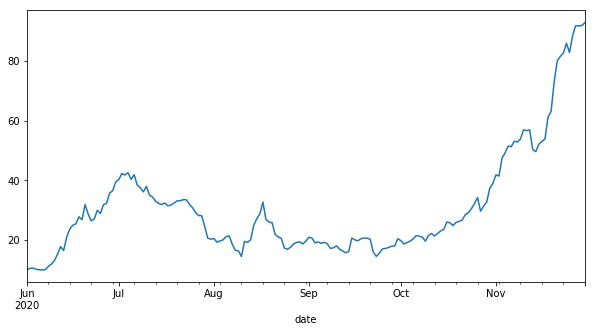

In [193]:
df_all_county.set_index('date')['response'].plot(figsize=(10,5))

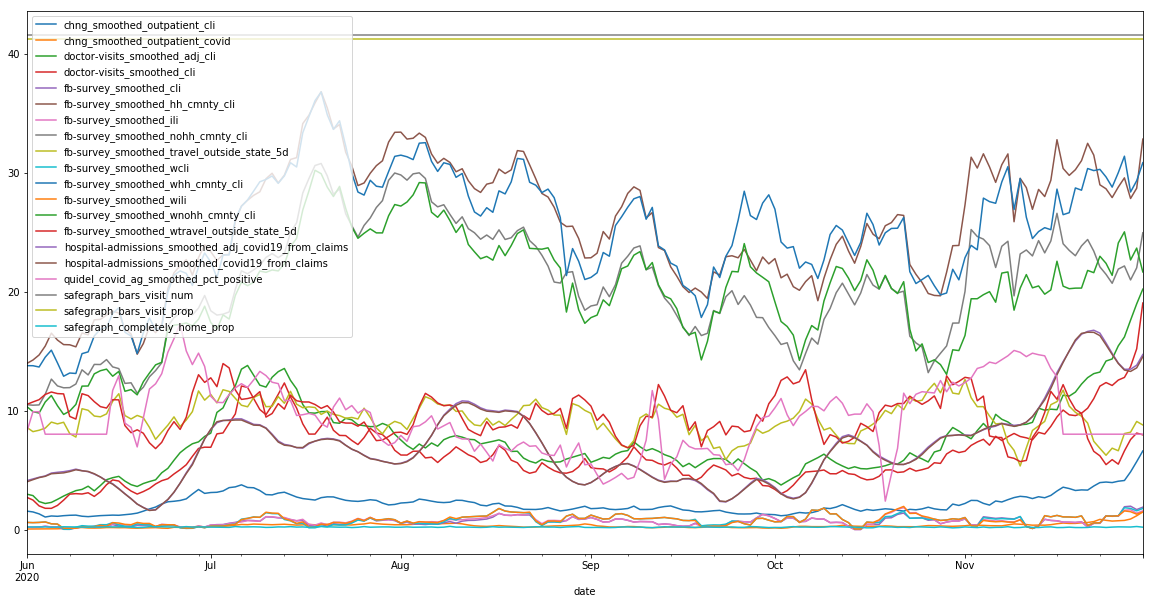

In [201]:
df_all_county.set_index('date').iloc[:,2:-10].plot(figsize=(20,10))

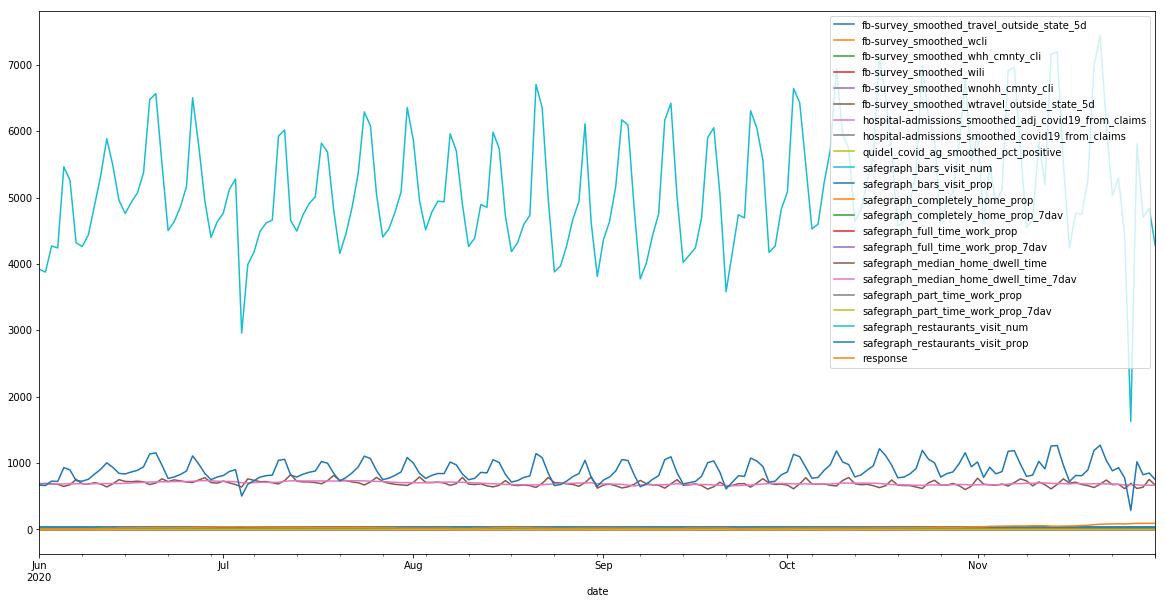

In [202]:
df_all_county.set_index('date').iloc[:,10:].plot(figsize=(20,10))

In [138]:
df_all_county
lagged_days=[1,2,3,5]
for f in feat_labels:
    for days in lagged_days:
        df_all_county[f+str(days)] = df_all_county[f].pct_change(periods=days)

In [145]:
start_test = pd.datetime(2020, 11, 1)
df_all_county_train, df_all_county_test = df_all_county[df_all_county.date<start_test], df_all_county[df_all_county.date>=start_test]

df_all_county_train=df_all_county_train[df_all_county_train.date>pd.datetime(2020, 10, 15)]

df_all_county_train=df_all_county_train.dropna()



/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [146]:
X_train,y_train= df_all_county_train.drop(['response', 'date'], axis=1), df_all_county_train['response']
X_test,y_test= df_all_county_test.drop(['response', 'date'], axis=1), df_all_county_test['response']


In [154]:
#model=make_pipeline( StandardScaler(), ElasticNet(random_state=0, alpha=0.01, l1_ratio=0.95))
model = make_pipeline(StandardScaler(), PCA(n_components=10), LinearRegression())

y_pred = model.fit(X_train,y_train ).predict(X_test)
scr = np.mean(np.abs(np.log(1 + y_pred) - np.log(1 + y_test)))
print(scr)

#y_pred_train = model.predict(X_train)
#scr_train = np.mean(np.abs(np.log(1 + y_pred_train) - np.log(1 + y_train)))
#print(scr_train)


0.09728167064861183


In [152]:
len(y_train)

16

In [ ]:
### All county 

In [ ]:
df_all = pd.read_csv('train_data.csv', index_col='Unnamed: 0')
df_all['date']=pd.to_datetime(df_all['date'])
feat_labels = df_all.columns[2:-1]

In [181]:
res=pd.DataFrame(index = np.unique(df_all.county), columns=['loss'])

for county in np.unique(df_all.county):
    df_all_county = df_all[df_all.county==county]
    df_all_county=df_all_county.drop('county', axis=1)
    start_test = pd.datetime(2020, 11, 1)
    df_all_county_train, df_all_county_test = df_all_county[df_all_county.date<start_test], df_all_county[df_all_county.date>=start_test]
    df_all_county_train=df_all_county_train[df_all_county_train.date>pd.datetime(2020, 10, 20)]
    df_all_county_train=df_all_county_train.dropna()
    
    X_train,y_train= df_all_county_train.drop(['response', 'date'], axis=1), df_all_county_train['response']
    X_test,y_test= df_all_county_test.drop(['response', 'date'], axis=1), df_all_county_test['response']


    model = make_pipeline(StandardScaler(), PCA(n_components=5), LinearRegression())
    y_pred = model.fit(X_train,y_train ).predict(X_test)
    scr = np.mean(np.abs(np.log(1 + y_pred) - np.log(1 + y_test)))
    res.loc[county] = scr






/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pand

/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invali

/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pand

/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/koloss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pand

In [203]:
y_pred

array([126.68740238, 128.23753134, 147.69333025, 143.29063097,
       142.26615424, 150.40084925, 157.33108453, 145.10587249,
       166.76660301, 158.30815467, 172.85177548, 184.5582283 ,
       199.16443216, 212.48030129, 217.56068255, 214.08402883,
       216.67304747, 220.3494704 , 210.99488289, 210.08697946,
       209.85951819, 198.99960089, 193.65391884, 190.56009003,
       181.72751283, 176.85006801, 180.1023585 , 197.69921714,
       211.20319727, 205.17126492])

In [188]:
y_test

15400    122.146642
15500    120.944968
15600    142.645790
15700    173.111763
15800    190.500695
15900    194.529838
16000    190.076575
16100    185.093162
16200    180.993332
16300    165.406912
16400    133.915980
16500    111.826382
16600     86.626568
16700     77.189892
16800     87.934273
16900     92.387536
17000     83.127576
17100     77.083862
17200     70.616028
17300     82.986203
17400     95.002944
17500     88.075646
17600     85.672298
17700     84.435280
17800     83.198263
17900     84.965431
18000     85.000774
18100     73.655556
18200     77.189892
18300     78.745000
Name: response, dtype: float64

In [184]:
import patsy

In [186]:
patsy.cr()


TypeError: memorize_chunk() missing 1 required positional argument: 'x'

In [ ]:

def select_all(treshold):
    assert(method in ['shift', 'diff', 'pct_change'])
    df_all = pd.read_csv('train_data.csv', index_col='Unnamed: 0')
    df_all['date'] = pd.to_datetime(df_all['date'])
    feat_labels = df_all.columns[2:-1]


    lag_l = list(range(21))

    all_lag = pd.DataFrame(index=feat_labels, columns=lag_l)
    res = pd.DataFrame(columns=feat_labels, index=np.unique(df_all.county))

    for lagg in lag_l:
        for county in np.unique(df_all.county):
            df_all_county = df_all[df_all.county == county]
            df_all_county = df_all_county.drop('county', axis=1)
            for f in feat_labels:
                if method == 'shift':
                    cor = df_all_county[f].shift(lagg).corr(df_all_county['response'])
                elif method == 'diff':
                    cor = df_all_county[f].diff(lagg).corr(df_all_county['response'])
                else:
                    cor = df_all_county[f].pct_change(lagg).corr(df_all_county['response'])

                res.loc[county, f] = cor

        all_lag[lagg] = res.abs().mean()

    final_df = all_lag.idxmax(axis=1)[all_lag.max(axis=1) > treshold]

    return final_df


In [10]:
df_all = pd.read_csv('train_data.csv', index_col='Unnamed: 0')
df_all['date'] = pd.to_datetime(df_all['date'])
feat_labels = df_all.columns[2:-1]
lag_l = list(range(21))
res = pd.DataFrame(index=df_all.index)



In [12]:
county=1073

In [22]:
df_all_county = df_all[df_all.county == county]
df_all_county = df_all_county.drop(['county', 'date', 'response'], axis=1)
f='chng_smoothed_adj_outpatient_cli'

In [23]:
df_all_county[f].shift(1)

1             NaN
101      1.734587
201      1.690302
301      1.540982
401      1.270211
           ...   
17801    4.377872
17901    4.680604
18001    4.795189
18101    5.616435
18201    6.072044
Name: chng_smoothed_adj_outpatient_cli, Length: 183, dtype: float64

In [25]:
res['a'] = df_all_county[f].shift(1)

In [29]:
res.loc[18201]

a    6.072044
Name: 18201, dtype: float64